In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

text = """
Artificial intelligence is transforming healthcare.
Doctors use machine learning to detect diseases earlier.
Legal disputes often arise over data privacy.
AI systems must be regulated carefully.
"""

query = "sickness recognition"
sentences = [s.strip() for s in text.split(".") if s.strip()]

model = SentenceTransformer("all-mpnet-base-v2")

sentence_embeddings = model.encode(sentences)
query_embedding = model.encode([query])

similarities = cosine_similarity(query_embedding, sentence_embeddings)[0]

print(f"Query: {query}\n")
for sent, score in zip(sentences, similarities):
    print(f"{score:.4f} | {sent}")

c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Query: sickness recognition

0.3301 | Artificial intelligence is transforming healthcare
0.4491 | Doctors use machine learning to detect diseases earlier
0.0506 | Legal disputes often arise over data privacy
0.2117 | AI systems must be regulated carefully


In [2]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

text = """
Artificial intelligence is transforming healthcare.
Doctors use machine learning to detect diseases earlier.
Legal disputes often arise over data privacy.
AI systems must be regulated carefully.
"""

query = "sickness recognition"
sentences = [s.strip() for s in text.split(".") if s.strip()]

model = SentenceTransformer("all-mpnet-base-v2")

sentence_embeddings = model.encode(sentences)
query_embedding = model.encode([query])

logits = cosine_similarity(query_embedding, sentence_embeddings)[0]

def softmax(logits, temperature=1.0):
    scaled = logits / temperature
    exp_scores = np.exp(scaled - np.max(scaled)) 
    return exp_scores / exp_scores.sum()

probs = softmax(logits, temperature=0.6)

print(f"Query: {query}\n")
for sent, logit, prob in zip(sentences, logits, probs):
    print(f"logit={logit:.4f} | prob={prob:.4f} | {sent}")


c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Query: sickness recognition

logit=0.3301 | prob=0.2726 | Artificial intelligence is transforming healthcare
logit=0.4491 | prob=0.3324 | Doctors use machine learning to detect diseases earlier
logit=0.0506 | prob=0.1711 | Legal disputes often arise over data privacy
logit=0.2117 | prob=0.2238 | AI systems must be regulated carefully


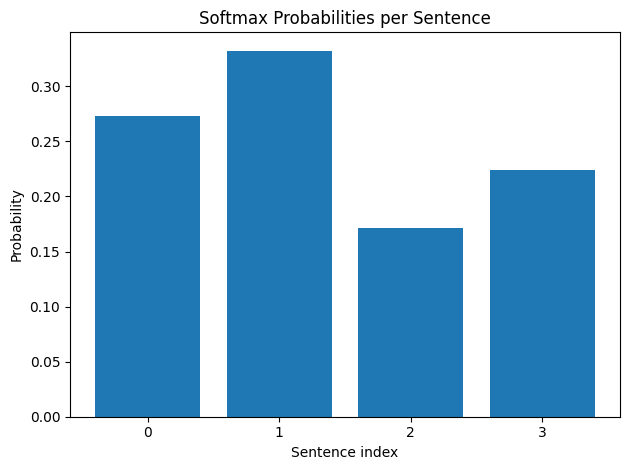

In [3]:
import matplotlib.pyplot as plt

x = range(len(sentences))

plt.figure()
plt.bar(x, probs)
plt.xticks(x, [str(i) for i in x])
plt.xlabel("Sentence index")
plt.ylabel("Probability")
plt.title("Softmax Probabilities per Sentence")
plt.tight_layout()
plt.show()
